# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fatma Meylinda Putri
- **Email:** meylinda922@gmail.com
- **ID Dicoding:** meylinda283

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda bulanan di tahun 2011 dan 2012, serta bagaimana perbandingan jumlah penyewaan antara pengguna kasual dan terdaftar?
- Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda harian berdasarkan cuaca, musim, dan hari kerja?



## Import Semua Packages/Library yang Digunakan

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [46]:
# Membaca data dari file CSV
hours_df = pd.read_csv("/content/hour.csv")
days_df = pd.read_csv("/content/day.csv")

# Menampilkan beberapa baris pertama dari setiap dataset
hours_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [47]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- hours.csv: data penyewaan sepeda yang terakumulasi berdasarkan jam.
- day.csv: data penyewaan sepeda yang terakumulasi berdasarkan hari.

### Assessing Data

In [48]:
print(hours_df.info())
print(days_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

In [49]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


**Insight:**
- Kedua dataset memiliki struktur yang baik dengan tidak adanya missing values dan duplikasi data.
- Terdapat kesalahan tipe data pada kolom dteday yang seharusnya direpresentasikan datetime.
- Terdapat kesalahan tipe data pada kolom season, yr, mnth, hr, weekday, weathersit seharusnya category.
- Terdapat kesalahan tipe data pada kolom holiday dan workingday seharusnya boolean.

### Cleaning Data

In [50]:
# hours_df
# Mengubah kolom dteday menjadi datetime
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

# Mengubah kolom kategori menjadi tipe 'category'
hours_df['season'] = hours_df['season'].astype('category')
hours_df['holiday'] = hours_df['holiday'].astype('bool')
hours_df['weekday'] = hours_df['weekday'].astype('category')
hours_df['workingday'] = hours_df['workingday'].astype('bool')
hours_df['weathersit'] = hours_df['weathersit'].astype('category')
hours_df['yr'] = hours_df['yr'].astype('category')
hours_df['mnth'] = hours_df['mnth'].astype('category')
hours_df['hr'] = hours_df['hr'].astype('category')

print(hours_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  bool          
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  bool          
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [51]:
# days_df
# Mengubah kolom dteday menjadi datetime
days_df['dteday'] = pd.to_datetime(days_df['dteday'])

# Mengubah kolom kategori menjadi tipe 'category'
days_df['season'] = days_df['season'].astype('category')
days_df['holiday'] = days_df['holiday'].astype('bool')
days_df['weekday'] = days_df['weekday'].astype('category')
days_df['workingday'] = days_df['workingday'].astype('bool')
days_df['weathersit'] = days_df['weathersit'].astype('category')
days_df['yr'] = days_df['yr'].astype('category')
days_df['mnth'] = days_df['mnth'].astype('category')

# Menampilkan info setelah perubahan
print(days_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    bool          
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    bool          
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: bool(2), category(5), d

**Insight:**
- Mengubah tipe data kolom dteday menjadi datetime.
- Mengubah tipe data pada kolom season, yr, mnth, hr, weekday, weathersit menjadi category.
- Mengubah tipe data pada kolom holiday dan workingday menjadi boolean.

## Exploratory Data Analysis (EDA)

### Explore


*   Berdasarkan Cuaca (Weather)
*   Berdasarkan Musim (Season)
*   Berdasarkan Hari Kerja (Working Day)








In [52]:
# Menampilkan statistik untuk semua tipe data
hours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379,17379.0,17379,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,24.0,2,7.0,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,5.0,17.0,False,6.0,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,730.0,16879,2512.0,11865,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [53]:
days_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731,731.0,731,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2,7.0,2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,False,0.0,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710,105.0,500,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [54]:
# Jumlah users berdasarkan season
days_df.groupby(by="season").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

<ipython-input-54-341f97dd79dc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by="season").agg({


casual                               registered                    \
          max  min         mean         std        max  min         mean   
season                                                                     
1        3155    9   334.928177  387.655561       5315  416  2269.204420   
2        3410  120  1106.097826  737.590829       6456  674  3886.233696   
3        3160  118  1202.611702  595.975032       6917  889  4441.691489   
4        3031    2   729.112360  606.318118       6946   20  3999.050562   

                      cnt                                  
                std   max   min         mean          std  
season                                                     
1       1200.269751  7836   431  2604.132597  1399.942119  
2       1353.375628  8362   795  4992.331522  1695.977235  
3       1304.626949  8714  1115  5644.303191  1459.800381  
4       1444.782557  8555    22  4728.162921  1699.615261

In [55]:
# Jumlah users berdasarkan year
days_df.groupby(by="yr").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

<ipython-input-55-2a27db9c15fc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by="yr").agg({


casual                              registered                    \
      max min         mean         std        max  min         mean   
yr                                                                    
0    3065   9   677.402740  556.269121       4614  416  2728.358904   
1    3410   2  1018.483607  758.989897       6946   20  4581.450820   

                  cnt                                 
            std   max  min         mean          std  
yr                                                    
0   1060.110413  6043  431  3405.761644  1378.753666  
1   1424.331846  8714   22  5599.934426  1788.667868

In [56]:
# Jumlah users berdasarkan month
days_df.groupby(by="mnth").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

<ipython-input-56-0baa06b96a7f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by="mnth").agg({


casual                               registered                     \
        max  min         mean         std        max   min         mean   
mnth                                                                      
1      1070    9   194.225806  197.384490       4185   416  1982.112903   
2      1435   47   262.508772  232.283549       4546   905  2392.789474   
3      3155   46   716.838710  624.308094       5893   491  2975.419355   
4      3252  120  1013.366667  738.345585       5950   674  3471.533333   
5      3410  255  1214.274194  754.950311       6433  2213  4135.500000   
6      2963  477  1231.766667  664.017647       6456  2993  4540.600000   
7      3065  562  1260.596774  598.382778       6790  2298  4303.080645   
8      2827  226  1161.919355  466.576274       6541   889  4502.500000   
9      3160  118  1172.050000  738.378375       6946  1689  4594.466667   
10     3031    2   963.870968  703.205576       6911    20  4235.354839   
11     2290   69   610.050000  470.933096       5520   935  3637.133333   
12     1153    9   349.887097  222.634531       6055   432  3053.919355   

                    cnt                                  
              std   max   min         mean          std  
mnth                                                     
1     1053.274474  4521   431  2176.338710  1161.674370  
2     1091.126003  5062  1005  2655.298246  1145.313307  
3     1513.254354  8362   605  3692.258065  1899.301812  
4     1414.571151  7460   795  4484.900000  1776.160778  
5     1093.179612  8294  2633  5349.774194  1298.711561  
6     1012.958885  8120  3767  5772.366667  1240.400031  
7     1190.542490  8173  3285  5563.677419  1273.751871  
8     1335.126601  7865  1115  5664.419355  1494.516146  
9     1547.716749  8714  1842  5766.516667  1810.130649  
10    1685.022519  8156    22  5199.225806  1988.392517  
11    1219.589045  6852  1495  4247.183333  1285.712709  
12    1465.052959  6606   441  3403.806452  1549.639353

In [57]:
# Jumlah users berdasarkan hour
hours_df.groupby(by="hr").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

<ipython-input-57-8ed55ae12661>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_df.groupby(by="hr").agg({


casual                           registered                              \
      max min       mean        std        max min        mean         std   
hr                                                                           
0      68   0  10.158402  10.667953        234   0   43.739669   34.019585   
1      49   0   6.504144   7.735334        139   0   26.871547   27.344153   
2      44   0   4.772028   6.514780        104   0   18.097902   21.303895   
3      26   0   2.715925   4.315795         61   0    9.011478    9.743691   
4      13   0   1.253945   1.887669         22   0    5.098996    3.134479   
5      16   0   1.411437   1.790581         64   0   18.478382   12.674751   
6      19   0   4.161379   3.691509        203   0   71.882759   53.535307   
7      40   0  11.055021   8.356205        572   1  201.009629  157.120459   
8      69   0  21.679505  13.741229        808   4  337.331499  229.698404   
9     142   0  30.891334  24.472856        399   6  188.418157   84.633490   
10    209   0  46.477304  41.346206        351   8  127.191197   66.281668   
11    268   0  59.540578  54.481788        446   5  148.602476   79.090301   
12    362   0  68.293956  64.394237        526   3  185.021978   89.240873   
13    355   0  72.308642  69.819228        491   9  181.352538   87.424775   
14    361   0  75.567901  71.599225        502  12  165.381344   84.055205   
15    357   0  74.905350  70.289359        456   4  176.327846   84.488219   
16    367   0  73.745205  67.015206        481   8  238.238356  103.765726   
17    347   0  74.273973  61.491021        885  14  387.178082  211.676303   
18    266   0  61.120879  50.981553        886  20  364.390110  203.599896   
19    230   0  48.770604  42.328913        662  11  262.752747  138.708622   
20    237   0  36.233516  32.103347        461   8  189.796703  100.293791   
21    222   0  28.255495  25.378252        362   6  144.059066   73.149848   
22    175   0  22.252747  20.450211        327   5  109.082418   55.252765   
23     71   0  15.199176  13.804596        220   2   72.631868   40.446431   

    cnt                              
    max min        mean         std  
hr                                   
0   283   2   53.898072   42.307910  
1   168   1   33.375691   33.538727  
2   132   1   22.869930   26.578642  
3    79   1   11.727403   13.239190  
4    28   1    6.352941    4.143818  
5    66   1   19.889819   13.200765  
6   213   1   76.044138   55.084348  
7   596   1  212.064649  161.441936  
8   839   5  359.011004  235.189285  
9   426  14  219.309491   93.703458  
10  539   8  173.668501  102.205413  
11  663  10  208.143054  127.495536  
12  776   3  253.315934  145.081134  
13  760  11  253.661180  148.107657  
14  750  12  240.949246  147.271574  
15  750   7  251.233196  144.632541  
16  783  11  311.983562  148.682618  
17  976  15  461.452055  232.656611  
18  977  23  425.510989  224.639304  
19  743  11  311.523352  161.050359  
20  567  11  226.030220  119.670164  
21  584   6  172.314560   89.788893  
22  502   9  131.335165   69.937782  
23  256   2   87.831044   50.846889

In [58]:
# Jumlah users berdasarkan holiday
days_df.groupby(by="holiday").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

casual                               registered                    \
           max  min         mean         std        max  min         mean   
holiday                                                                     
False     3410    2   841.771831  680.528529       6946   20  3685.332394   
True      3065  117  1064.714286  860.046809       5172  573  2670.285714   

                       cnt                                  
                 std   max   min         mean          std  
holiday                                                     
False    1553.704431  8714    22  4527.104225  1929.013947  
True     1492.860246  7403  1000  3735.000000  2103.350660

In [59]:
# Jumlah users berdasarkan weekday
days_df.groupby(by="weekday").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

<ipython-input-59-2423248759ea>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by="weekday").agg({


casual                              registered                     \
           max min         mean         std        max   min         mean   
weekday                                                                     
0         3283  54  1338.295238  809.324777       5657   451  2890.533333   
1         3065   2   674.133333  493.777298       6435    20  3663.990476   
2         1348   9   556.182692  342.748705       6697   573  3954.480769   
3         2562   9   551.144231  401.808954       6946   432  3997.394231   
4         1405  15   590.961538  371.680307       6781   416  4076.298077   
5         2469  38   752.288462  483.422400       6917  1129  3938.000000   
6         3410  57  1465.257143  927.082884       5966   570  3085.285714   

                       cnt                                  
                 std   max   min         mean          std  
weekday                                                     
0        1179.713036  8227   605  4228.828571  1872.496629  
1        1504.215925  7525    22  4338.123810  1793.074013  
2        1549.462149  7767   683  4510.663462  1826.911642  
3        1723.710208  8173   441  4548.538462  2038.095884  
4        1642.753330  7804   431  4667.259615  1939.433317  
5        1494.998698  8362  1167  4690.288462  1874.624870  
6        1358.068784  8714   627  4550.542857  2196.693009

In [60]:
# Jumlah users berdasarkan workingday
days_df.groupby(by="workingday").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

casual                              registered                    \
              max min         mean         std        max  min         mean   
workingday                                                                    
False        3410  54  1371.134199  873.064794       5966  451  2959.034632   
True         2469   2   606.570000  391.496032       6946   20  3978.250000   

                          cnt                                 
                    std   max  min         mean          std  
workingday                                                    
False       1293.867686  8714  605  4330.168831  2052.141245  
True        1568.692453  8362   22  4584.820000  1878.415583

In [61]:
# Jumlah users berdasarkan weathersit
days_df.groupby(by="weathersit").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

<ipython-input-61-b176648f5521>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by="weathersit").agg({


casual                             registered                    \
              max min        mean         std        max  min         mean   
weathersit                                                                   
1            3410  15  964.030238  700.476488       6946  416  3912.755940   
2            3155   9  687.352227  619.082767       6844  491  3348.510121   
3            1264   2  185.476190  260.975022       4324   20  1617.809524   

                          cnt                                 
                    std   max  min         mean          std  
weathersit                                                    
1           1533.347265  8714  431  4876.786177  1879.483989  
2           1463.566884  8362  605  4035.862348  1809.109918  
3           1068.290954  4639   22  1803.285714  1240.284449

In [62]:
# Mengurutkan DataFrame days_df berdasarkan kolom 'cnt' secara menurun (dari yang terbesar ke terkecil)
days_df.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,False,6,False,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,4,1,9,False,6,False,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,3,1,9,False,6,False,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,2,1,3,False,5,True,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,2,1,5,False,6,False,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-03-06,1,0,3,False,0,False,2,0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,1,0,1,False,3,True,3,0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,1,1,12,False,3,True,3,0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,1,0,1,False,4,True,1,0.195000,0.219700,0.687500,0.113837,15,416,431


In [63]:
# Menghitung jumlah pengguna berdasarkan musim
hours_df.groupby('season')['cnt'].sum().reset_index()

<ipython-input-63-2f72ed0ad485>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_df.groupby('season')['cnt'].sum().reset_index()


,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [64]:
days_df.groupby('season')['cnt'].sum().reset_index()

<ipython-input-64-37b5468add98>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby('season')['cnt'].sum().reset_index()


,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [65]:
# Menghitung jumlah pengguna berdasarkan holiday
hours_df.groupby('holiday')['cnt'].sum().reset_index()

,holiday,cnt
0,False,3214244
1,True,78435


In [66]:
days_df.groupby('holiday')['cnt'].sum().reset_index()

,holiday,cnt
0,False,3214244
1,True,78435


**Insight:**
- Kedua dataframe memberikan hasil yang sama untuk agregasi berdasarkan season dan holiday, berarti pengukuran jumlah pengguna (cnt) pada masing-masing musim dan hari libur adalah identik, menunjukkan bahwa data di kedua file tidak berbeda secara substansial dalam hal jumlah pengguna di waktu yang lebih luas (daily vs. hourly).
- hours_df memiliki informasi tambahan berupa jam (hr), yang memungkinkan analisis yang lebih detail tentang perilaku pengguna berdasarkan waktu dalam sehari.
- Jumlah penyewaan sepeda sangat dipengaruhi oleh kondisi cuaca. Pada cuaca cerah (weathersit 1), baik pengguna kasual maupun terdaftar jauh lebih banyak dibandingkan dengan kondisi cuaca berkabut atau hujan (wathersit 2 dan 3).
- Pengguna terdaftar cenderung lebih stabil dan memiliki jumlah yang lebih besar dibandingkan pengguna kasual.
- Pada cuaca yang lebih ekstrem seperti hujan atau salju ringan (weathersit 3), jumlah pengguna, baik kasual maupun terdaftar, berkurang drastis, yang berdampak langsung pada total penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren penyewaan sepeda bulanan di tahun 2011 dan 2012, serta bagaimana perbandingan jumlah penyewaan antara pengguna kasual dan terdaftar?

In [67]:
monthly_rentals_df = days_df.resample(rule='M', on="dteday").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})
monthly_rentals_df.index = monthly_rentals_df.index.strftime('%Y-%m')
monthly_rentals_df = monthly_rentals_df.reset_index()
monthly_rentals_df.rename(columns={
    "dteday": "month",
    "cnt": "total_rentals",
    "casual": "casual_rentals",
    "registered": "registered_rentals"
})

monthly_rentals_df

<ipython-input-67-1a97fc818be1>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rentals_df = days_df.resample(rule='M', on="dteday").agg({


,dteday,cnt,casual,registered
0,2011-01,38189,3073,35116
1,2011-02,48215,6242,41973
2,2011-03,64045,12826,51219
3,2011-04,94870,22346,72524
4,2011-05,135821,31050,104771
5,2011-06,143512,30612,112900
6,2011-07,141341,36452,104889
7,2011-08,136691,28842,107849
8,2011-09,127418,26545,100873
9,2011-10,123511,25222,98289


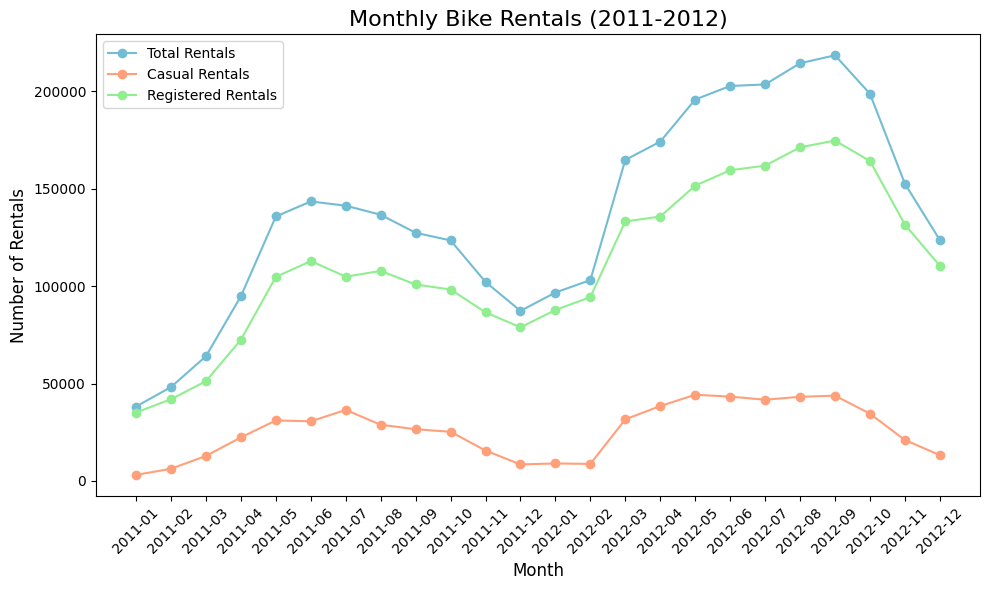

In [68]:
# Membuat visualisasi data penyewaan sepeda bulanan
plt.figure(figsize=(10, 6))

# Plot total penyewaan
plt.plot(monthly_rentals_df['dteday'], monthly_rentals_df['cnt'], marker='o', label='Total Rentals', color='#72BCD4')

# Plot penyewaan kasual
plt.plot(monthly_rentals_df['dteday'], monthly_rentals_df['casual'], marker='o', label='Casual Rentals', color='#FFA07A')

# Plot penyewaan terdaftar
plt.plot(monthly_rentals_df['dteday'], monthly_rentals_df['registered'], marker='o', label='Registered Rentals', color='#90EE90')

# Menambahkan judul dan label
plt.title('Monthly Bike Rentals (2011-2012)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Rentals', fontsize=12)

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Pertanyaan 2: Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda harian berdasarkan cuaca, musim, dan hari kerja?

In [69]:
# Mengelompokkan data berdasarkan musim
seasonal_rentals = days_df.groupby(by='season')['cnt'].sum().reset_index()

# Menambahkan label musim
seasonal_rentals['season'] = seasonal_rentals['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

seasonal_rentals

<ipython-input-69-eae4e26ca7dc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rentals = days_df.groupby(by='season')['cnt'].sum().reset_index()


,season,cnt
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


<ipython-input-70-fc1ce8918a21>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=seasonal_rentals, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wi

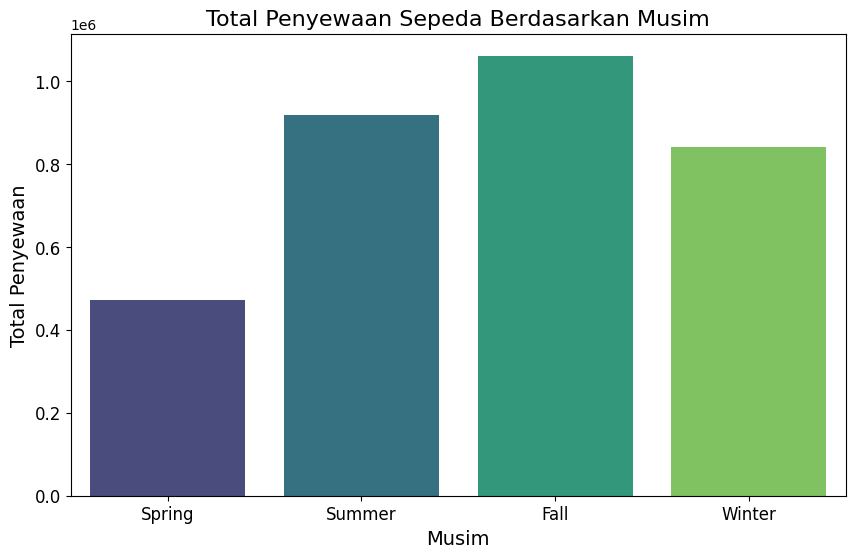

In [70]:
# Membuat grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=seasonal_rentals, palette='viridis')
plt.title('Total Penyewaan Sepeda Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [71]:
# Mengelompokkan data berdasarkan kondisi cuaca
weather_rentals = days_df.groupby(by='weathersit')['cnt'].sum().reset_index()

# Menambahkan label kondisi cuaca
weather_rentals['weathersit'] = weather_rentals['weathersit'].map({
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
})

weather_rentals

<ipython-input-71-1bd91b63f88f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_rentals = days_df.groupby(by='weathersit')['cnt'].sum().reset_index()


,weathersit,cnt
0,Clear,2257952
1,Mist,996858
2,Light Rain/Snow,37869


<ipython-input-72-f9433db04919>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_rentals, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

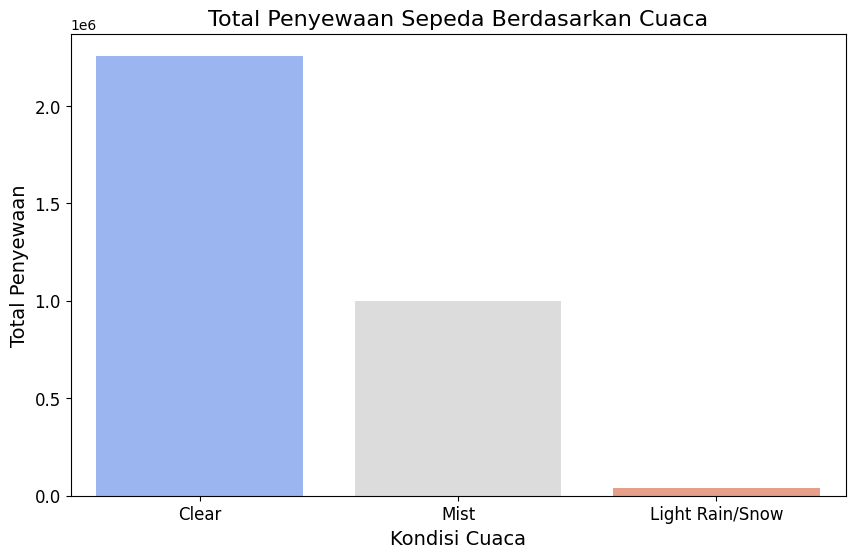

In [72]:
# Membuat grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_rentals, palette='coolwarm')
plt.title('Total Penyewaan Sepeda Berdasarkan Cuaca', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [73]:
# Mengelompokkan data berdasarkan hari kerja
workingday_rentals = days_df.groupby(by='workingday')['cnt'].sum().reset_index()

# Menambahkan label hari kerja
workingday_rentals['workingday'] = workingday_rentals['workingday'].map({
    False: 'Not Working Day',
    True: 'Working Day'
})
workingday_rentals

,workingday,cnt
0,Not Working Day,1000269
1,Working Day,2292410


<ipython-input-74-f4dd10cc573a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=workingday_rentals, palette='muted')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


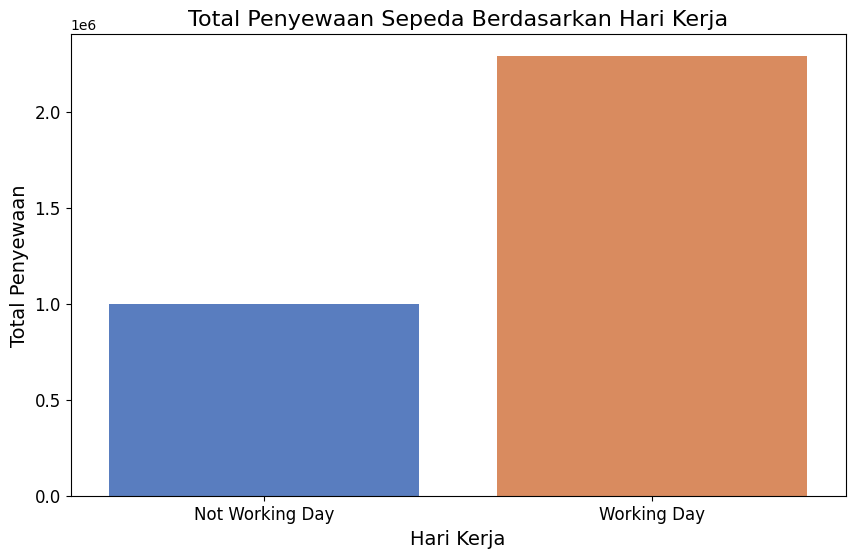

In [74]:
# Membuat grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=workingday_rentals, palette='muted')
plt.title('Total Penyewaan Sepeda Berdasarkan Hari Kerja', fontsize=16)
plt.xlabel('Hari Kerja', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**Insight:**

 **- Tren Penyewaan Sepeda Bulanan:**
 - Pada tahun 2011, jumlah penyewaan sepeda meningkat secara bertahap setiap bulannya dari 38.189 di bulan Januari hinga mencapai puncak pada bulan Juni dengan 143.512 penyewaan.
 - Setelah bulan Juni, terdapat sedikit fluktuasi, dengan angka yang cukup konsisten, meski mulai menurun secara bertahap di bulan September hingga Desember.
 - Pada tahun 2012, jumlah penyewaan kembali meningkat, dimulai dengan 96.744 di bulan Januari, lalu terus naik secara signifikan hingga mencapai puncaknya di bulan September dengan 218.573 penyewaan.
 - Tren penyewaan lebih tinggi di tahun 2012 dibandingkan tahun 2011, dengan lonjakan besar selama bulan-bulan musim panas (Juni-Agustus) di kedua tahun.

**- Perbandingan Pengguna Kasual dan Terdaftar**
- Pengguna terdaftar secara konsisten mendominasi penyewaan sepeda dibandingkan pengguna kasual. Di bulan-bulan dengan jumlah penyewaan tertinggi, seperti Mei hingga September 2012, pengguna terdaftar menyumbang sebagian besar penyewaan.
- Pengguna kasual biasanya hanya sekitar 20-30% dari total penyewaan, dengan jumlah tertinggi pada bulan liburan dan musim panas (contohnya bulan Agustus 2012, dengan 43.197 penyewaan kasual dibandingkan 171.306 penyewaan terdaftar).
- Peningkatan pada pengguna terdaftar lebih stabil sepanjang tahun, sementara pengguna kasual mengalami fluktuasi yang lebih besar, kemungkinan terkait dengan musim liburan atau faktor cuaca.

**- Musim (Season)**
- Jumlah penyewaan sepeda tertinggi terjadi pada musim Fall dengan total 1.061.129 penyewaan, diikuti oleh Summer dengan 918.589 penyewaan.
- Penyewaan terendah terjadi pada musim Spring (471.348), dan sedikit lebih tinggi pada musim Winter dengan 841.613 penyewaan.
- Ini menunjukkan bahwa penyewaan sepeda lebih populer di musim yang lebih hangat seperti Summer dan Fall, sementara cuaca musim semi dan dingin mungkin kurang mendukung aktivitas bersepeda.

**Cuaca (Weathersit)**
- Kondisi cuaca yang Clear (Cerah) mendominasi jumlah penyewaan sepeda dengan total 2.257.952 penyewaan, jauh lebih tinggi dibandingkan kondisi Mist (Kabut) yang hanya mencatat 996.858 penyewaan.
- Light Rain/Snow (Hujan/Salju Ringan) mencatat jumlah penyewaan terendah dengan hanya 37.869 penyewaan.
- Ini mengindikasikan bahwa cuaca cerah sangat memengaruhi peningkatan jumlah penyewaan sepeda, sedangkan cuaca buruk (hujan atau salju) menyebabkan penurunan tajam dalam jumlah pengguna.

**Hari Kerja (Working Day)**
- Jumlah penyewaan lebih tinggi pada hari kerja dengan 2.292.410 penyewaan dibandingkan hari libur atau tidak bekerja yang hanya mencatat 1.000.269 penyewaan.
- Ini menunjukkan bahwa sepeda kemungkinan besar digunakan sebagai sarana transportasi pada hari kerja, mungkin untuk bekerja atau keperluan lain, sementara penyewaan menurun pada hari libur.

## Conclusion

**Conclution pertanyaan 1: Bagaimana tren penyewaan sepeda bulanan di tahun 2011 dan 2012, serta bagaimana perbandingan jumlah penyewaan antara pengguna kasual dan terdaftar?**

Tren penyewaan bulanan menunjukkan peningkatan signifikan dari awal hingga puncaknya di bulan musim panas (Juni-September), baik di tahun 2011 maupun 2012, dengan jumlah yang lebih tinggi di tahun 2012.

Pengguna terdaftar secara konsisten melakukan penyewaan lebih banyak dibandingkan pengguna kasual, terutama selama bulan-bulan sibuk. Penyewaan dari pengguna kasual cenderung meningkat di musim panas dan bulan liburan, sementara pengguna terdaftar lebih stabil sepanjang tahun.

Hal ini menunjukkan bahwa sebagian besar pelanggan adalah pengguna tetap, sementara peningkatan musiman mungkin didorong oleh aktivitas rekreasi yang dilakukan oleh pengguna kasual.


**Conclution pertanyaan 2: Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda harian berdasarkan cuaca, musim, dan hari kerja?**

Musim memainkan peran penting dalam memengaruhi jumlah penyewaan sepeda, dengan musim Fall dan Summer mencatat jumlah tertinggi. Cuaca yang lebih dingin atau lebih basah di musim Spring dan Winter tampaknya menyebabkan penurunan jumlah pengguna.

Cuaca adalah faktor utama yang memengaruhi penggunaan sepeda. Cuaca cerah secara signifikan meningkatkan jumlah penyewaan, sedangkan kondisi buruk seperti hujan atau salju ringan menyebabkan penurunan drastis.

Penyewaan sepeda cenderung lebih banyak terjadi pada hari kerja, menunjukkan bahwa sepeda sering digunakan sebagai alat transportasi harian untuk bekerja atau aktivitas lain di hari kerja, sementara penggunaannya menurun pada hari tidak bekerja atau hari li





In [75]:
days_df.to_csv("days.csv", index=False)